In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

0


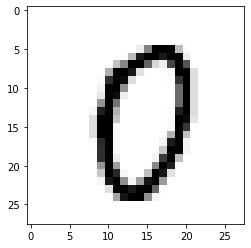

In [3]:
import matplotlib.pyplot as plt
#Verificar que el set de datos se cargara correctamente
image_index = 1000 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Se manejan los datos para que estos sean de un mismo tamano y puedan alimentar el modelo
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# convierte los datos en flotantes
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Se normalizan los datos para obtener unicos tamanos.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Se importan lops modelos de Keras que contienen el modelo CNN 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Se crea el modelo secuencial de layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening para la salida de las layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
import os
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#Export Model

checkpoint_path = (r"C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\Num_Predictor\num_predictor.ckpt") 
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

model.fit(x=x_train,y=y_train, epochs=3, callbacks=[cp_callback])

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 136s 2ms/step - loss: 0.1977 - acc: 0.9407

Epoch 00001: saving model to C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\Num_Predictor\num_predictor.ckpt
Epoch 2/3
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0787 - acc: 0.9754

Epoch 00002: saving model to C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\Num_Predictor\num_predictor.ckpt
Epoch 3/3
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0545 - acc: 0.9833 0s - loss: 0.0545 - acc: 0.98

Epoch 00003: saving model to C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\Num_Predictor\num_predictor.ckpt


In [ ]:
import cv2
from skimage.color import rgb2gray
from skimage.transform import resize

img_rows, img_cols = 28, 28

image_original=cv2.imread(r"C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\placa_7_bn.png")
image_original_gray = rgb2gray(image_original)
image_original_gray_res = resize(image_original_gray, (28,28))

#image1 = image_original.reshape(367500, 28, 28,1)
#prediction = model.predict(r'C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\1.jpg')

#print(prediction)

image_index = 3333
plt.imshow(image_original_gray_res.reshape(28, 28),cmap='Greys')
pred = model.predict(image_original_gray_res.reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

#model.evaluate(x_test, y_test)

3


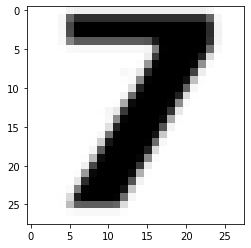

In [8]:
import cv2
from skimage.color import rgb2gray
from skimage.transform import resize

img_rows, img_cols = 28, 28

image_original=cv2.imread(r"C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\placa_7_bn.png")
image_original_gray = rgb2gray(image_original)
image_original_gray_res = resize(image_original_gray, (28,28))

dia_semana = 0 # El dia es lunes
pred = model.predict(image_original_gray_res.reshape(1, img_rows, img_cols, 1))

if pred.argmax() == 0:
    if dia_semana == 0:
        print("El carro no cumple con la restriccion vehicular")
    elif dia_semana == 1:
        print("El carro no cumple con la restriccion vehicular")
    else:
        print("El carro cumple con la restriccion vehicular")
if pred.argmax() == 1:
    if dia_semana == 0:
        print("El carro no cumple con la restriccion vehicular")
    elif dia_semana == 1:
        print("El carro no cumple con la restriccion vehicular")
    else:
        print("El carro cumple con la restriccion vehicular")
        
if pred.argmax() == 2:
    if dia_semana == 2:
        print("El carro no cumple con la restriccion vehicular")
    elif dia_semana == 3:
        print("El carro no cumple con la restriccion vehicular")
    else:
        print("El carro cumple con la restriccion vehicular")      
if pred.argmax() == 3:
    if dia_semana == 2:
        print("El carro no cumple con la restriccion vehicular")
    elif dia_semana == 3:
        print("El carro no cumple con la restriccion vehicular")
    else:
        print("El carro cumple con la restriccion vehicular")
        
if pred.argmax() == 4:
    if dia_semana == 4:
        print("El carro no cumple con la restriccion vehicular")
    elif dia_semana == 5:
        print("El carro no cumple con la restriccion vehicular")
    else:
        print("El carro cumple con la restriccion vehicular")
if pred.argmax == 5:
    if dia_semana == 4:
        print("El carro no cumple con la restriccion vehicular")
    elif dia_semana == 5:
        print("El carro no cumple con la restriccion vehicular")
    else:
        print("El carro cumple con la restriccion vehicular")     
        
if pred.argmax == 6:
    if dia_semana == 6:
        print("El carro cumple con la restriccion vehicular")
    elif dia_semana == 7:
        print("El carro cumple con la restriccion vehicular")
    else:
        print("El carro no cumple con la restriccion vehicular")
if pred.argmax == 7:
    if dia_semana == 6:
        print("El carro cumple con la restriccion vehicular")
    elif dia_semana == 7:
        print("El carro cumple con la restriccion vehicular")
    else:
        print("El carro no cumple con la restriccion vehicular")
        
if pred.argmax == 8:
    if dia_semana == 8:
        print("El carro cumple con la restriccion vehicular")
    elif dia_semana == 9:
        print("El carro cumple con la restriccion vehicular")
    else:
        print("El carro no cumple con la restriccion vehicular")
if pred.argmax == 9:
    if dia_semana == 8:
        print("El carro cumple con la restriccion vehicular")
    elif dia_semana == 9:
        print("El carro cumple con la restriccion vehicular")
    else:
        print("El carro no cumple con la restriccion vehicular")

plt.imshow(image_original_gray_res.reshape(28, 28),cmap='Greys')
print(pred.argmax())
